In [ ]:
data <- read.csv("downloads/steamerprojections.csv")
data_pitchers <- read.csv("downloads/steamerprojectionspitchers.csv")
atchitters <- read.csv("downloads/FanGraphs Leaderboard (1).csv")
atcpitchers <- read.csv("downloads/FanGraphs Leaderboard (2).csv")

In [ ]:
install.packages("tidyverse")
install.packages("dplyr")
install.packages("infer")
install.packages("gridExtra")
install.packages("cowplot")
install.packages("GGally")
install.packages("tidymodels")


In [ ]:
update.packages("tidyverse")
update.packages("dplyr")
update.packages("infer")
update.packages("gridExtra")
update.packages("cowplot")
update.packages("tidymodels")
update.packages("GGally")

In [4]:
library(tidyverse)
library(repr)
library(digest)
library(gridExtra)
library(cowplot)
library(dplyr)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘repr’ was built under R version 4.1.2”

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“package ‘tidymodels’ was built under R version 4.1.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.2.0 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.2.0 
✔ infer        1.0.0      ✔ workflows    0.2.6 
✔ modeldata   

In [ ]:
head(data)

In [ ]:
colnames(data)

In [ ]:
better_data <- data %>%
select(Name, Team, G, PA, AB, H, X2B, X3B, HR, R, RBI, BB, SO, HBP, SB, CS, AVG, OBP, SLG, OPS, 
      wOBA, BsR, Fld, Off, Def, WAR, ADP, playerid)
head(better_data)
       

In [ ]:
fantasy_data <- better_data %>%
select(Name, Team, G, H, PA, X2B, X3B, HR, R, RBI, BB, SO, SB, AVG, OBP, SLG, OPS, WAR) %>%
filter(G > 50) %>%
mutate(XBH = (X2B + X3B + HR)) %>%
mutate(TB = (H-XBH) + 2*X2B + 3*X3B + 4*HR) %>%
mutate(Fpoints = TB + R + RBI + BB + SB - SO)
head(fantasy_data)

In [ ]:
top_fantasy_hitters <- arrange(fantasy_data, desc(Fpoints)) %>%
mutate(Fpoints_game = Fpoints/G) %>%
mutate(Fpoints_PA = Fpoints/PA)

head(top_fantasy_hitters)


In [ ]:
head(data_pitchers)
colnames(data_pitchers)

In [ ]:
pitchers_fantasy <- data_pitchers %>%
select(Name, GS, G, IP, W, L, SV, H, ER, SO, BB, WHIP, K.9, BB.9, ERA, FIP, WAR) %>%
filter(G > 10) %>%
mutate(Fpoints = 3*IP + 5*W - 5*L + 5*SV - 2 *ER - H + SO -BB) %>%
mutate(Fpoints_inning = Fpoints/IP)
head(pitchers_fantasy)
#pitchers_fantasy

In [ ]:
starters <- pitchers_fantasy %>%
filter(GS > 5) 

top_starters <- arrange(starters, desc(Fpoints))

relievers <- pitchers_fantasy %>%
filter(GS <= 5) 

top_relievers <- arrange(relievers, desc(Fpoints))

head(top_starters)
head(top_relievers)

In [ ]:
hitters_data <- fantasy_data %>%
select(Name, G, Fpoints)

pitchers_data <- pitchers_fantasy %>%
select(Name, G, Fpoints)

overall_rankings <- rbind(hitters_data, pitchers_data) %>%
arrange(desc(Fpoints)) 
overall_st <- overall_rankings %>% mutate(rank = c(1:nrow(overall_rankings)))
head(overall_st)

In [ ]:
#overall_rankings %>% slice(1:350)
top_fantasy_hitters %>% filter(Name == "Brandon Woodruff")

In [ ]:

atcfantasyhitters <- atchitters %>%
select(Name, Team, G, PA, AB, H, X2B, X3B, HR, R, RBI, BB, SO, HBP, SB, CS, AVG, OBP, SLG, OPS, 
      wOBA, WAR, ADP, playerid) %>%
select(Name, Team, G, H, PA, X2B, X3B, HR, R, RBI, BB, SO, SB, AVG, OBP, SLG, OPS, WAR) %>%
filter(G > 50) %>%
mutate(XBH = (X2B + X3B + HR)) %>%
mutate(TB = (H-XBH) + 2*X2B + 3*X3B + 4*HR) %>%
mutate(Fpoints = TB + R + RBI + BB + SB - SO) 
atcfantasy <- arrange(atcfantasyhitters, desc(Fpoints)) %>%
mutate(Fpoints_game = Fpoints/G) %>%
mutate(Fpoints_PA = Fpoints/PA)

atcfantasypitchers <- atcpitchers %>%
select(Name, GS, G, IP, W, L, SV, H, ER, SO, BB, WHIP, K.9, BB.9, ERA, FIP, WAR) %>%
filter(G > 10) %>%
mutate(Fpoints = 3*IP + 5*W - 5*L + 5*SV - 2 *ER - H + SO -BB) %>%
mutate(Fpoints_inning = Fpoints/IP)

atcstarters <- atcfantasypitchers %>% filter(GS>5)
atctops <- arrange(atcstarters, desc(Fpoints))
atcrelievers <- atcfantasypitchers %>% filter(GS<=5)
atctopr <- arrange(atcrelievers, desc(Fpoints))

hitter <- atcfantasyhitters %>%
select(Name, G, Fpoints)

pitcher <- atcfantasypitchers %>%
select(Name, G, Fpoints)

atcoverall_rankings <- rbind(hitter, pitcher) %>%
arrange(desc(Fpoints)) 

atcoverall <- atcoverall_rankings %>%
mutate(rank = c(1:nrow(atcoverall_rankings))) %>%
rename(Gatc = G, Fpointsatc = Fpoints, rankatc = rank)

both_proj <- merge(atcoverall, overall_st, by = "Name") 
both <- arrange(both_proj, rank) %>%
mutate(AvgG = (G + Gatc) /2, AvgFpoints = (Fpoints + Fpointsatc)/2, Avgrank = (rank + rankatc)/2) %>%
arrange(Avgrank) %>%
mutate(bothrank = c(1:nrow(both_proj)))
both <- both[, c(1,2,5,8,3,6,9,4,7,10,11)]
#both %>% slice(1:300)
both %>% filter(Name == "")
#é
#í
#á
#ñ
#ú

In [ ]:
numeric_data <- fantasy_data %>%
select(H, HR, RBI, BB, OBP, AVG, SLG, OPS, TB, Fpoints)

corr_data <- recipe(Fpoints ~ . , data = numeric_data) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

corr <- corr_data %>%
            prep() %>%
            bake(numeric_data)
ggpairs(corr)

##Highest correlation between Fpoints and TB, then H, then RBI

In [ ]:
tbwalk <- fantasy_data %>%
mutate(TBwalk = TB + BB)
arranged_tbwalk <- arrange(tbwalk, desc(TBwalk))
head(arranged_tbwalk)

In [ ]:
normalized_data <- fantasy_data %>%
mutate(H1 = (H-min(H))/(max(H)-min(H)), 
        HR1 = (HR-min(HR))/(max(HR)-min(HR)),
       RBI1 = (RBI-min(RBI))/(max(RBI)-min(RBI)),
       BB1 = (BB-min(BB))/(max(BB)-min(BB)),
       OPS1 = (OPS-min(OPS))/(max(OPS)-min(OPS)),
       TB1 = (TB-min(TB))/(max(TB)-min(TB))) %>%
select(Name,H1,HR1,RBI1,BB1,OPS1,TB1,Fpoints) %>%
mutate(Score = (H1 + HR1 + RBI1 + BB1 + OPS1 + TB1)/6)
normalized_score <- arrange(normalized_data, desc(Score)) %>%
mutate(rank = c(1:nrow(normalized_data)))
normalized_score %>% filter(Name == "Andrew McCutchen")
##head(normalized_score)

In [ ]:
set.seed(1848)
x <- rep_sample_n(as.data.frame(rnorm(100, 30, 2)), size = 100, reps = 1000) %>%
group_by(replicate) %>%
summarize(sum = sum(rnorm(100,30,2))) %>%
summarize(sd = sd(sum))
x
##

In [12]:
pitch <- read.csv("downloads/stats (2).csv")
pitch <- pitch %>% select(-player_id, -year, -X)

In [15]:

pitch <- pitch %>%
rename(IP = p_formatted_ip, 
      H = p_total_hits,
      K = p_strikeout, 
      BB = p_walk, 
      ER = p_earned_run,
      S = p_save,
      W = p_win, 
      L = p_loss, 
      )
head(pitch)

,last_name,first_name,IP,H,K,BB,ER,S,W,L,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wainwright,Adam,34.0,31,28,13,12,0,3,3,0.257,0.406,0.320,0.326,0.149,85.9,4.9,6.1
2,Greinke,Zack,28.0,24,7,3,8,0,0,2,0.325,0.535,0.388,0.358,0.211,89.1,13.4,5.3
3,Verlander,Justin,32.2,19,31,4,7,0,3,1,0.233,0.432,0.295,0.265,0.199,88.3,15.8,8.5
4,Kluber,Corey,26.2,22,25,6,7,0,1,1,0.269,0.464,0.334,0.317,0.195,87.3,15.1,5.5
5,Scherzer,Max,31.0,16,42,9,9,0,4,0,0.190,0.364,0.278,0.262,0.174,87.0,19.6,12.3
6,Carrasco,Carlos,30.0,24,28,6,11,0,2,1,0.256,0.411,0.302,0.306,0.155,88.1,15.5,7.1


In [17]:
pitch <- pitch %>%
mutate(Fpoints = 3*IP + K + 5*S + 5*W - BB - H - 2*ER - 5*L)
head(pitch)

,last_name,first_name,IP,H,K,BB,ER,S,W,L,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,Fpoints
,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Wainwright,Adam,34.0,31,28,13,12,0,3,3,0.257,0.406,0.320,0.326,0.149,85.9,4.9,6.1,62.0
2,Greinke,Zack,28.0,24,7,3,8,0,0,2,0.325,0.535,0.388,0.358,0.211,89.1,13.4,5.3,38.0
3,Verlander,Justin,32.2,19,31,4,7,0,3,1,0.233,0.432,0.295,0.265,0.199,88.3,15.8,8.5,100.6
4,Kluber,Corey,26.2,22,25,6,7,0,1,1,0.269,0.464,0.334,0.317,0.195,87.3,15.1,5.5,61.6
5,Scherzer,Max,31.0,16,42,9,9,0,4,0,0.190,0.364,0.278,0.262,0.174,87.0,19.6,12.3,112.0
6,Carrasco,Carlos,30.0,24,28,6,11,0,2,1,0.256,0.411,0.302,0.306,0.155,88.1,15.5,7.1,71.0


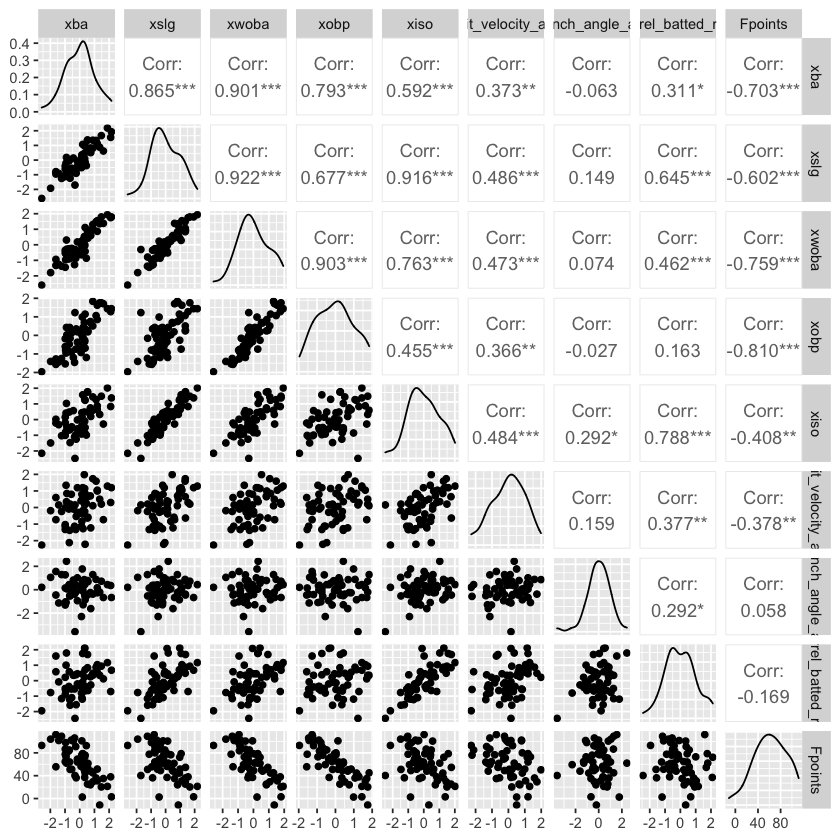

In [21]:
pitch_numeric <- pitch %>%
select(xba, xslg, xwoba, xobp, xiso, 
       exit_velocity_avg, launch_angle_avg, barrel_batted_rate, Fpoints)


pitch_corr <- recipe(Fpoints ~ . , data = pitch_numeric) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

pc <- pitch_corr %>%
            prep() %>%
            bake(pitch_numeric)
ggpairs(pc)

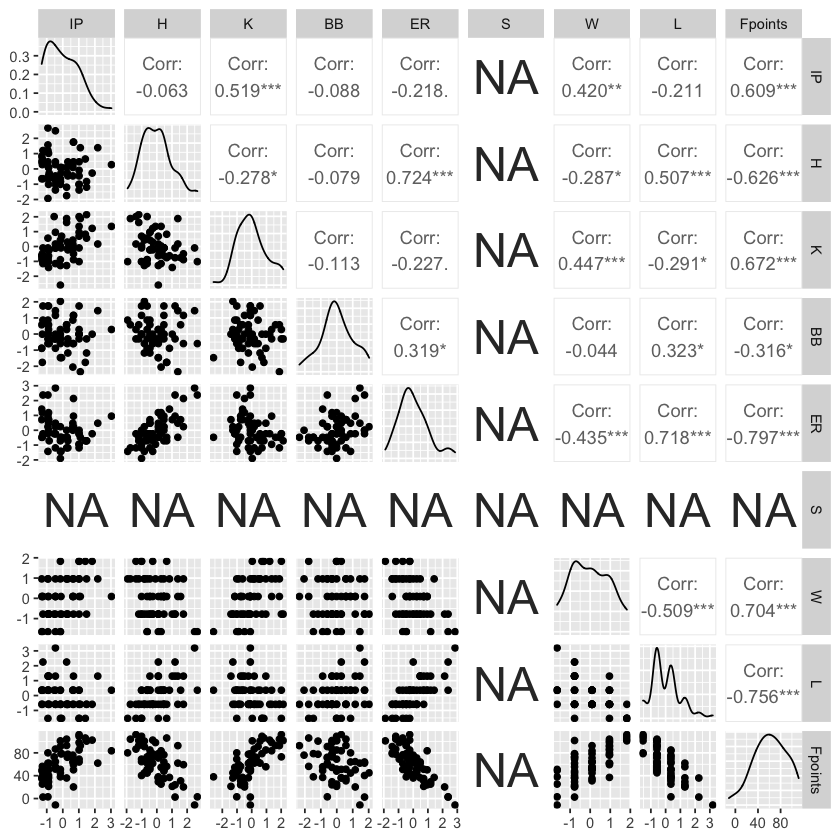

In [22]:
pitch_numeric <- pitch %>%
select(IP, H, K, BB, ER, S, W, L, Fpoints)


pitch_corr <- recipe(Fpoints ~ . , data = pitch_numeric) %>%
                step_scale(all_predictors()) %>%
                step_center(all_predictors())

pc <- pitch_corr %>%
            prep() %>%
            bake(pitch_numeric)
ggpairs(pc)